In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import math
import random

In [2]:

#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

def method_one(count, r1, r2):
    x_values = []
    y_values = []
    for i in range (count):
        rand_radius = random.uniform(r1, r2)
        rand_angle = random.uniform(0, math.pi*2)
        x_values.append(rand_radius * math.cos(rand_angle)) 
        y_values.append(rand_radius * math.sin(rand_angle))
    return [x_values, y_values]

def method_two(count, wavelength, amplitude, x_bound, y_bound, y_below):
    x_values = []
    y_values = []
    for i in range (count):
        rand_x = random.uniform(-x_bound, x_bound)
        rand_y = 0
        if(y_below == 1):
            rand_y = random.uniform(-y_bound, (math.cos(rand_x / wavelength) * amplitude))
        else:
            rand_y = random.uniform(y_bound, (math.cos(rand_x / wavelength) * amplitude))
        x_values.append(rand_x) 
        y_values.append(rand_y)
    return [x_values, y_values]

def method_three(count, r1, r2, x, y):
    x_values = []
    y_values = []
    for i in range (count):
        rand_radius = random.uniform(r1, r2)
        rand_angle = random.uniform(0, math.pi*2)
        x_values.append(x + rand_radius * math.cos(rand_angle)) 
        y_val = y + rand_radius * math.sin(rand_angle)
        if(x_values[i] > (x + ((r1 + r2) / 2))):
            y_val += random.uniform(0, (r1 / 2))
        y_values.append(y + rand_radius * math.sin(rand_angle))
    return [x_values, y_values]

In [3]:

    
SAMPLE_SIZE = 100

#generated_pos_values = method_one(SAMPLE_SIZE, 5, 8) 
#generated_pos_values = method_two(SAMPLE_SIZE, 3, 10, 20, 20, 1) 
generated_pos_values = method_three(SAMPLE_SIZE, .01, 5, 4, 3) 


#df_pos = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=SAMPLE_SIZE),
#                       'Y': np.random.uniform(low=-5, high=0, size=SAMPLE_SIZE)})
df_pos = pd.DataFrame({'X': generated_pos_values[0],
                       'Y': generated_pos_values[1]})

#print (generated_values[0])
pos_label = []
for i in range (SAMPLE_SIZE):
    pos_label.append(1)
df_pos['Label'] = pos_label

#generated_neg_values = method_one(SAMPLE_SIZE, 1, 5.5) 
#generated_neg_values = method_two(SAMPLE_SIZE, 3, 14, 20, 20, 0) 
generated_neg_values = method_three(SAMPLE_SIZE, .01, 6, -3, -3) 
                        
df_neg = pd.DataFrame({'X': generated_neg_values[0],
                       'Y': generated_neg_values[1]})

neg_label = []
for i in range (SAMPLE_SIZE):
    neg_label.append(-1)
df_neg['Label'] = neg_label

df = pd.concat([df_neg, df_pos])
X = df[['X', 'Y']]
y = df['Label']


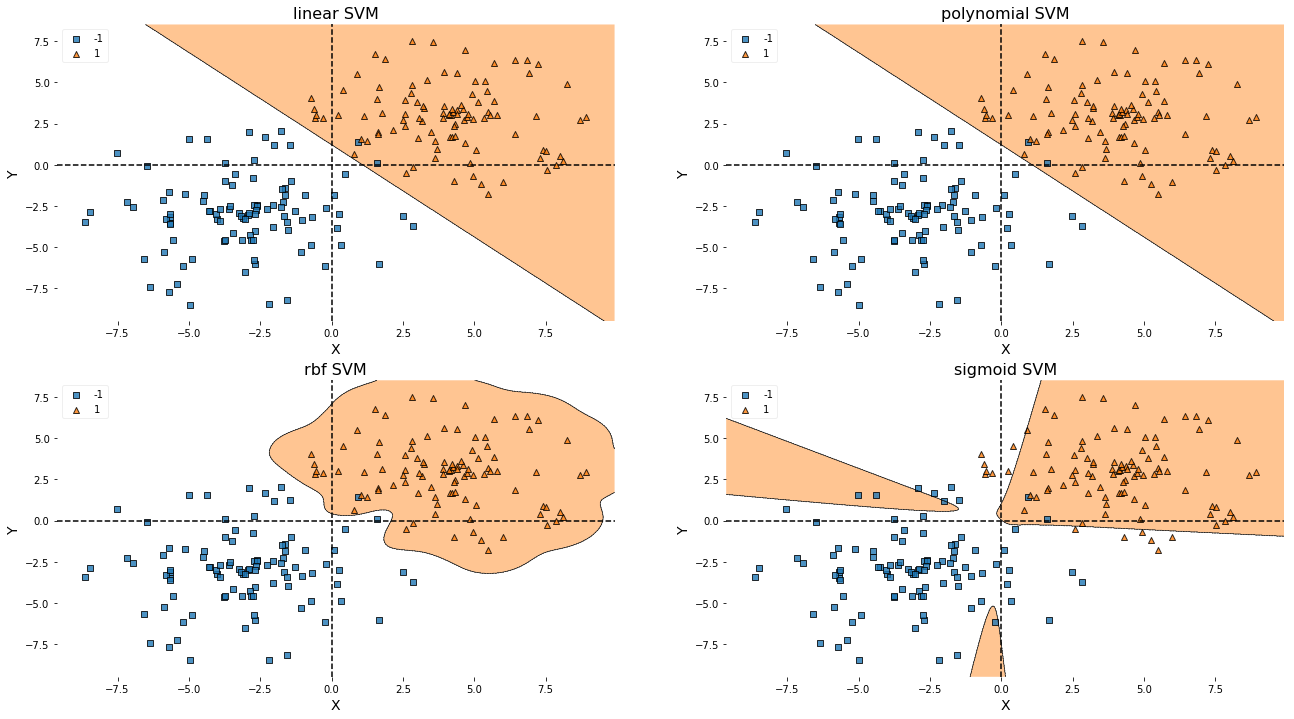

In [4]:
clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X.values, y.values) 
clf_poly1 = svm.SVC(kernel='poly', degree = 1, gamma = 1)
clf_poly1.fit(X.values, y.values) 
clf_rbf = svm.SVC(kernel='rbf', gamma = 1)
clf_rbf.fit(X.values, y.values) 
clf_sigmoid = svm.SVC(kernel='sigmoid', gamma = 1)
clf_sigmoid.fit(X.values, y.values) 

plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_lin, X, y, "linear SVM", 1, dims)
define_plot(clf_poly1, X, y, "polynomial SVM", 2, dims)
define_plot(clf_rbf, X, y, "rbf SVM", 3, dims)
define_plot(clf_sigmoid, X, y, "sigmoid SVM", 4, dims)

In [5]:
print("accuracy for linear svm: " + str(clf_lin.score(X.values, y.values)*100 )+ "%")
print("accuracy for polynomial svm: " + str(clf_poly1.score(X.values, y.values)*100 )+ "%")
print("accuracy for rbf svm: " + str(clf_rbf.score(X.values, y.values)*100 )+ "%")
print("accuracy for sigmoid svm: " + str(clf_sigmoid.score(X.values, y.values)*100 )+ "%")

accuracy for linear svm: 99.0%
accuracy for polynomial svm: 99.0%
accuracy for rbf svm: 99.5%
accuracy for sigmoid svm: 90.5%


In [7]:
SAMPLE_SIZE = 100

generated_pos_values = method_one(SAMPLE_SIZE, 5, 8) 
#generated_pos_values = method_two(SAMPLE_SIZE, 3, 10, 20, 20, 1) 
#generated_pos_values = method_three(SAMPLE_SIZE, .01, 5, 4, 3) 


#df_pos = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=SAMPLE_SIZE),
#                       'Y': np.random.uniform(low=-5, high=0, size=SAMPLE_SIZE)})
df_pos = pd.DataFrame({'X': generated_pos_values[0],
                       'Y': generated_pos_values[1]})

#print (generated_values[0])
pos_label = []
for i in range (SAMPLE_SIZE):
    pos_label.append(1)
df_pos['Label'] = pos_label

generated_neg_values = method_one(SAMPLE_SIZE, .001, 3) 
#generated_neg_values = method_two(SAMPLE_SIZE, 3, 14, 20, 20, 0) 
#generated_neg_values = method_three(SAMPLE_SIZE, .01, 6, -3, -3) 
                        
df_neg = pd.DataFrame({'X': generated_neg_values[0],
                       'Y': generated_neg_values[1]})

neg_label = []
for i in range (SAMPLE_SIZE):
    neg_label.append(-1)
df_neg['Label'] = neg_label

df_circle = pd.concat([df_neg, df_pos])
X_circle = df_circle[['X', 'Y']]
y_circle = df_circle['Label']

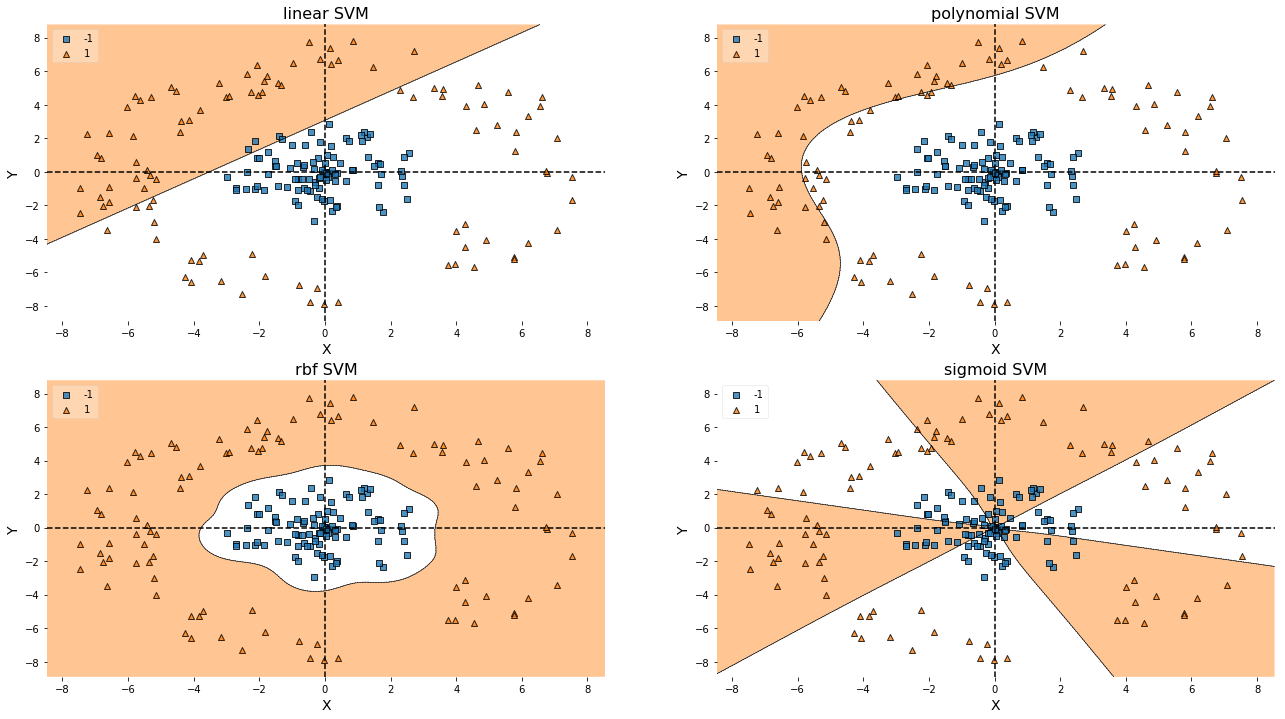

In [8]:
clf_lin_circle = svm.SVC(kernel='linear')
clf_lin_circle.fit(X_circle.values, y_circle.values) 
clf_poly1_circle = svm.SVC(kernel='poly', gamma = 1)
clf_poly1_circle.fit(X_circle.values, y_circle.values) 
clf_rbf_circle = svm.SVC(kernel='rbf', gamma = 1)
clf_rbf_circle.fit(X_circle.values, y_circle.values) 
clf_sigmoid_circle = svm.SVC(kernel='sigmoid', gamma = 1)
clf_sigmoid_circle.fit(X_circle.values, y_circle.values) 

plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_lin_circle, X_circle, y_circle, "linear SVM", 1, dims)
define_plot(clf_poly1_circle, X_circle, y_circle, "polynomial SVM", 2, dims)
define_plot(clf_rbf_circle, X_circle, y_circle, "rbf SVM", 3, dims)
define_plot(clf_sigmoid_circle, X_circle, y_circle, "sigmoid SVM", 4, dims)

In [9]:
print("accuracy for linear svm: " + str(clf_lin_circle.score(X_circle.values, y_circle.values)*100 )+ "%")
print("accuracy for polynomial svm: " + str(clf_poly1_circle.score(X_circle.values, y_circle.values)*100 )+ "%")
print("accuracy for rbf svm: " + str(clf_rbf_circle.score(X_circle.values, y_circle.values)*100 )+ "%")
print("accuracy for sigmoid svm: " + str(clf_sigmoid_circle.score(X_circle.values, y_circle.values)*100 )+ "%")

accuracy for linear svm: 72.0%
accuracy for polynomial svm: 69.0%
accuracy for rbf svm: 100.0%
accuracy for sigmoid svm: 54.0%


In [10]:

SAMPLE_SIZE = 100

#generated_pos_values = method_one(SAMPLE_SIZE, 5, 8) 
generated_pos_values = method_two(SAMPLE_SIZE, 6, 8, 10, 10, 1) 
#generated_pos_values = method_three(SAMPLE_SIZE, .01, 5, 4, 3) 


#df_pos = pd.DataFrame({'X': np.random.uniform(low=-5, high=5, size=SAMPLE_SIZE),
#                       'Y': np.random.uniform(low=-5, high=0, size=SAMPLE_SIZE)})
df_pos = pd.DataFrame({'X': generated_pos_values[0],
                       'Y': generated_pos_values[1]})

#print (generated_values[0])
pos_label = []
for i in range (SAMPLE_SIZE):
    pos_label.append(1)
df_pos['Label'] = pos_label

#generated_neg_values = method_one(SAMPLE_SIZE, .001, 3) 
generated_neg_values = method_two(SAMPLE_SIZE, 6, 8, 10, 10, 0) 
#generated_neg_values = method_three(SAMPLE_SIZE, .01, 6, -3, -3) 
                        
df_neg = pd.DataFrame({'X': generated_neg_values[0],
                       'Y': generated_neg_values[1]})

neg_label = []
for i in range (SAMPLE_SIZE):
    neg_label.append(-1)
df_neg['Label'] = neg_label

df_sine = pd.concat([df_neg, df_pos])
X_sine = df_sine[['X', 'Y']]
y_sine = df_sine['Label']


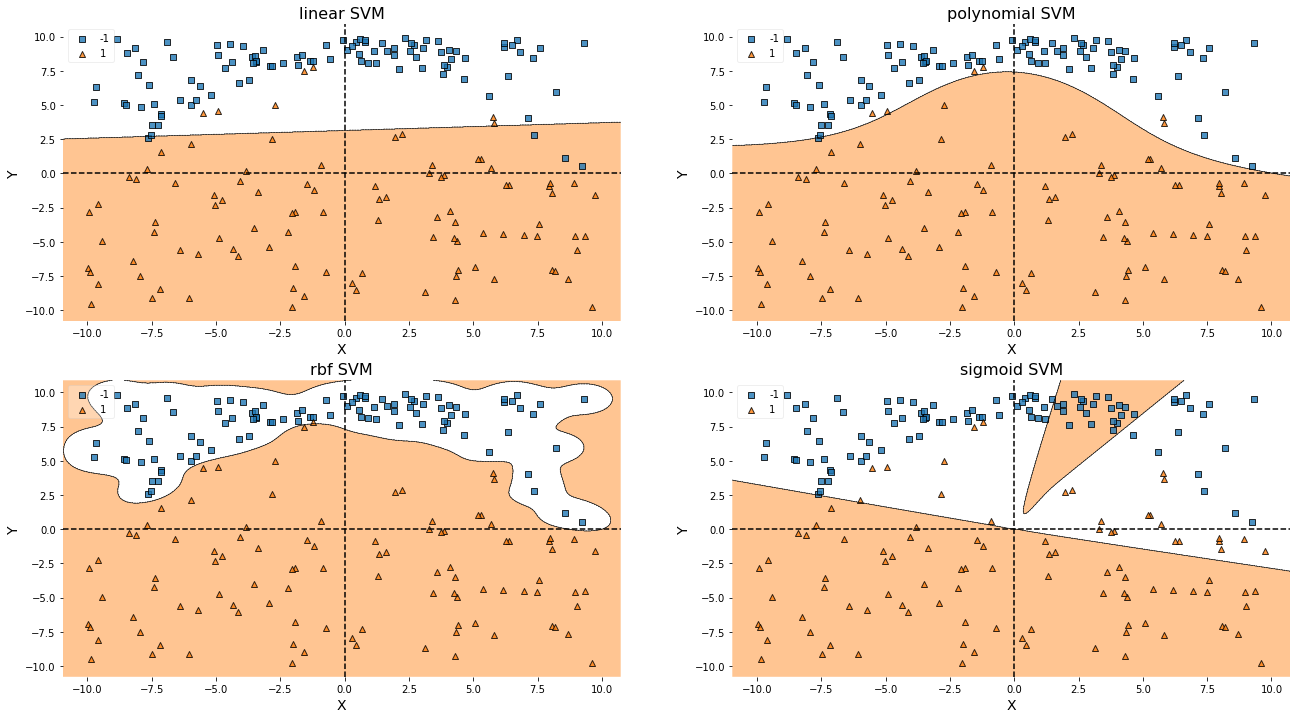

In [11]:
clf_lin_sine = svm.SVC(kernel='linear')
clf_lin_sine.fit(X_sine.values, y_sine.values) 
clf_poly1_sine = svm.SVC(kernel='poly', gamma = 1)
clf_poly1_sine.fit(X_sine.values, y_sine.values) 
clf_rbf_sine = svm.SVC(kernel='rbf', gamma = 1)
clf_rbf_sine.fit(X_sine.values, y_sine.values) 
clf_sigmoid_sine = svm.SVC(kernel='sigmoid', gamma = 1)
clf_sigmoid_sine.fit(X_sine.values, y_sine.values) 

plt.figure(figsize=(22,12))
dims = [2,2]

#XOR SVM Decision Region Boundary
define_plot(clf_lin_sine, X_sine, y_sine, "linear SVM", 1, dims)
define_plot(clf_poly1_sine, X_sine, y_sine, "polynomial SVM", 2, dims)
define_plot(clf_rbf_sine, X_sine, y_sine, "rbf SVM", 3, dims)
define_plot(clf_sigmoid_sine, X_sine, y_sine, "sigmoid SVM", 4, dims)

In [12]:
print("accuracy for linear svm: " + str(clf_lin_sine.score(X_sine.values, y_sine.values)*100 )+ "%")
print("accuracy for polynomial svm: " + str(clf_poly1_sine.score(X_sine.values, y_sine.values)*100 )+ "%")
print("accuracy for rbf svm: " + str(clf_rbf_sine.score(X_sine.values, y_sine.values)*100 )+ "%")
print("accuracy for sigmoid svm: " + str(clf_sigmoid_sine.score(X_sine.values, y_sine.values)*100 )+ "%")

accuracy for linear svm: 94.5%
accuracy for polynomial svm: 96.5%
accuracy for rbf svm: 99.5%
accuracy for sigmoid svm: 76.5%
